# **Medical School Application Classifier**

**Description**

In this project for the University of Cincinnati's Digital Scholarship Center, the goal was to create a text classifier that could, as accurately as possible, give the likelihood for a med school applicant to go into either (1. Family Medicine) or (2. A different medical specialization). 

It was suggested that the UC Admissions Department would then use this technology to spend time and resources guiding applicants who are more likely to go into the Family Medicine Specialization to pursue that path.

**Data**

Our corpus of data was 260 medical school admissions essays. 135 were written by someone who went into Family Medicine, and 125 were written by someone who went into a different medical specialization.

**Results**

We were able to achieve an accuracy of 0.8 using a K-Neighbors Classifier on a representation of the dataset created in the following way:

1. A researcher working for the DSC identified vocabulary that would be likely found in family medicine specialization essays ("compassion", "strive", "happy") and that would be likely found in other specialization essays ("trauma", "pharma", "muscle"). 

2. A feature vector was created so that each essay had the following features:

  a. Total sum of terms from Family Medicine vocab

  b. Total sum of terms from non-Family Medicine vocab

  c. An binary indication as to whether the essay was written by a family medicine (1) or non-family medicine specialist (0).

This was the most succesful classifier, and can be found under ***04 Using Sum Of Words Associated With Either Family Medicine Or Non Family Medicine***.



In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **01 Bag of Words Method**

Data was derived to protect student privacy. We import a CSV file where the first 135 entries correspond to FM and the last 125 entries correspond to NON-FM.

In [ ]:
from scipy import sparse
import pandas as pd

df = pd.read_csv('/content/drive/My Drive/Derived Data/01_derivedBOWdf.csv', index_col=0)
display(df)

,label
0,family
1,family
2,family
3,family
4,family
...,...
255,other
256,other
257,other
258,other


The text data was lemmatized with TextBlob.

https://textblob.readthedocs.io/en/dev/

In [ ]:
fv = sparse.load_npz("/content/drive/My Drive/Derived Data/01_derivedBOWTEXTBLOG.npz")
print(fv.shape)
print(fv[:1])

(260, 17341)
  (0, 4196)	3
  (0, 5053)	3
  (0, 674)	3
  (0, 12419)	3
  (0, 15029)	2


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(fv, df['label'],
                                                stratify=df['label'], 
                                                test_size=0.25,
                                                    random_state = 42)
print(X_train.shape)
print(X_test.shape)

(195, 17341)
(65, 17341)


## Linear SVC Classifier

In [ ]:
from sklearn.svm import SVC
classifier_svc = SVC().fit(X_train, y_train)

import numpy as np
predicted_svc = classifier_svc.predict(X_test)
print("Accuracy:", np.mean(predicted_svc == y_test))

from sklearn.metrics import confusion_matrix
print("Confusion Matrix")
print(confusion_matrix(y_test, predicted_svc))

Accuracy: 0.5076923076923077
Confusion Matrix
[[26  8]
 [24  7]]


## Multinomial Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifier_mnb = MultinomialNB().fit(X_train, y_train)

predicted_mnb = classifier_mnb.predict(X_test)

print("Accuracy:", classifier_mnb.score(X_test, y_test))

from sklearn.metrics import confusion_matrix
print("Confusion Matrix")
print(confusion_matrix(y_test, predicted_mnb))

Accuracy: 0.6153846153846154
Confusion Matrix
[[29  5]
 [20 11]]


### Final Results:

Linear SVC: 0.5076923076923077

Multinomial Naive Bayes Classifier: 0.6153846153846154

# **02 Using Count Of Words Associated With Family Medicine**

## Importing the data

In [ ]:
import pandas as pd

df = pd.read_json('/content/drive/My Drive/Derived Data/02_derivedFM_TERMS.json')
display(df)

,compassion,strive,happy,joy,play,give,encourage,feel,breast,chart,math,diagnosis,pediatric,symptom,curriculum,rehabilitation,EMT,database,sick,income,disable,underserved,outreach,urban,specialist,profit,afford,disparity,inner,community,child,club,group,member,participate,people,target
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,2,0,0,1
2,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,5,0,0,2,0,6,1
3,0,0,0,0,0,10,0,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,1,1,3,4,1
4,2,0,0,0,3,2,0,0,0,0,0,0,0,0,2,0,0,0,1,0,0,1,1,0,0,0,0,0,0,3,2,0,3,2,4,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,0,0,1,0,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1,0,10,3,0,1,0
256,0,0,0,0,0,6,3,1,0,0,0,2,0,3,0,1,0,0,0,0,0,0,2,0,0,0,0,0,0,8,5,2,8,4,8,1,0
257,2,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,5,1,0,0,0,0,0,0,1,0,0,0,0,2,0,0,3,8,1,0,0
258,0,0,1,0,0,2,0,4,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,0,1,1,1,0,2,0


## Creating the feature vector

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split
X = df[["compassion", "strive", "happy", "joy", "play", "give", "encourage", "feel", "breast", "chart", "math", "diagnosis", "pediatric", "symptom", "curriculum", "rehabilitation", "EMT", "database", "sick", "income", "disable", "underserved", "outreach", "urban", "specialist", "profit", "afford", "disparity", "inner", "community", "child", "club", "group", "member", "participate", "people"]]
y = df['target']

print(df['target'].value_counts())

1    135
0    125
Name: target, dtype: int64


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                stratify=y, 
                                                test_size=0.25,
                                                    random_state = 42)

print(X_train.shape)
print(X_test.shape)

(195, 36)
(65, 36)


## Linear SVC Classifer

In [ ]:
from sklearn.svm import SVC
classifier_svc = SVC().fit(X_train, y_train)

import numpy as np
predicted_svc = classifier_svc.predict(X_test)
print("Accuracy:", np.mean(predicted_svc == y_test))

from sklearn.metrics import confusion_matrix
print("Confusion Matrix")
print(confusion_matrix(y_test, predicted_svc))

Accuracy: 0.6307692307692307
Confusion Matrix
[[22  9]
 [15 19]]


## Multinomial Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifier_mnb = MultinomialNB().fit(X_train, y_train)

predicted_mnb = classifier_mnb.predict(X_test)

print("Accuracy:", classifier_mnb.score(X_test, y_test))

from sklearn.metrics import confusion_matrix
print("Confusion Matrix")
print(confusion_matrix(y_test, predicted_mnb))

Accuracy: 0.5846153846153846
Confusion Matrix
[[20 11]
 [16 18]]


## KNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import metrics

range_k = range(1,15)
scores = {}
scores_list = []
for k in range_k:
   classifier = KNeighborsClassifier(n_neighbors=k)
   classifier.fit(X_train, y_train)
   y_pred = classifier.predict(X_test)
   scores[k] = metrics.accuracy_score(y_test,y_pred)
   scores_list.append(metrics.accuracy_score(y_test,y_pred))
result = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = metrics.classification_report(y_test, y_pred)
print("Classification Report:",)
print(result1)

Confusion Matrix:
[[24  7]
 [21 13]]
Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.77      0.63        31
           1       0.65      0.38      0.48        34

    accuracy                           0.57        65
   macro avg       0.59      0.58      0.56        65
weighted avg       0.59      0.57      0.55        65



Text(0, 0.5, 'Accuracy')

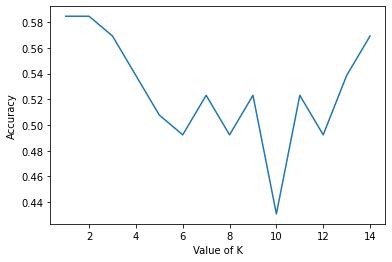

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(range_k,scores_list)
plt.xlabel("Value of K")
plt.ylabel("Accuracy")

Look at the graph and determine what value of K will work best.

In [ ]:
classifier = KNeighborsClassifier(n_neighbors = 2)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5846153846153846


## Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7076923076923077


## Final Results:

Linear SVC: 0.6307692307692307

Multinomial Naive Bayes: 0.5846153846153846

KNeighbors: 0.5846153846153846

**Random Forest: 0.7076923076923077**



# **03 Using Count Of Words Associated With Non Family Medicine**

## Importing the data

In [ ]:
import pandas as pd

df = pd.read_json('/content/drive/My Drive/Derived Data/03_derivedNONFM_TERMS.json')
display(df)

,trauma,failure,fear,difficult,suffer,stress,muscle,pharma,cardiac,robot,instrument,interpret,nutrition,tumor,cpr,rigor,transplant,spinal,anatomy,surgery,tissue,device,mouse,article,protocol,sequence,assay,discipline,cure,career,success,goal,reward,target
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2,1,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,3,0,0,1,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,2,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,5,1,0,2,0
256,0,0,0,1,0,0,1,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,2,0,2,0,0,3,2,2,4,0
257,0,0,0,1,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,2,0
258,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1,0,0,0,0,0,2,0,1,2,0


## Creating the feature vector

In [ ]:
nonfmwordlist = ["trauma", "failure", "fear", "difficult", "suffer", "stress", "muscle", "pharma", "cardiac", "robot", "instrument", "interpret", "nutrition", "tumor", "cpr", "rigor", "transplant", "spinal", "anatomy", "surgery", "tissue", "device", "mouse", "article", "protocol", "sequence", "assay", "instrument", "discipline", "cure", "career", "success", "goal", "reward"]
X = df[nonfmwordlist]
y = df['target']

print (df['target'].value_counts())

1    135
0    125
Name: target, dtype: int64


In [ ]:
import sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                stratify=y, 
                                                test_size=0.25,
                                                    random_state = 42)

print(X_train.shape)
print(X_test.shape)

(195, 34)
(65, 34)


## Linear SVC Classifer

In [ ]:
from sklearn.svm import SVC
classifier_svc = SVC().fit(X_train, y_train)

import numpy as np
predicted_svc = classifier_svc.predict(X_test)
print("Accuracy:", np.mean(predicted_svc == y_test))

from sklearn.metrics import confusion_matrix
print("Confusion Matrix")
print(confusion_matrix(y_test, predicted_svc))

Accuracy: 0.6307692307692307
Confusion Matrix
[[21 10]
 [14 20]]


## Multinomial Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifier_mnb = MultinomialNB().fit(X_train, y_train)

predicted_mnb = classifier_mnb.predict(X_test)

print("Accuracy:", classifier_mnb.score(X_test, y_test))

from sklearn.metrics import confusion_matrix
print("Confusion Matrix")
print(confusion_matrix(y_test, predicted_mnb))

Accuracy: 0.4
Confusion Matrix
[[ 8 23]
 [16 18]]


## KNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import metrics

range_k = range(1,15)
scores = {}
scores_list = []
for k in range_k:
   classifier = KNeighborsClassifier(n_neighbors=k)
   classifier.fit(X_train, y_train)
   y_pred = classifier.predict(X_test)
   scores[k] = metrics.accuracy_score(y_test,y_pred)
   scores_list.append(metrics.accuracy_score(y_test,y_pred))
result = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = metrics.classification_report(y_test, y_pred)
print("Classification Report:",)
print(result1)

Confusion Matrix:
[[14 17]
 [10 24]]
Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.45      0.51        31
           1       0.59      0.71      0.64        34

    accuracy                           0.58        65
   macro avg       0.58      0.58      0.57        65
weighted avg       0.58      0.58      0.58        65



Text(0, 0.5, 'Accuracy')

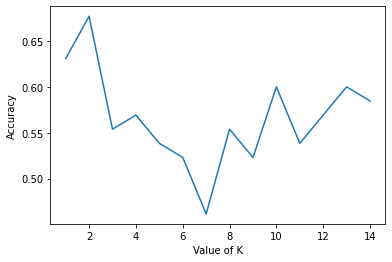

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(range_k,scores_list)
plt.xlabel("Value of K")
plt.ylabel("Accuracy")

Look at the graph and determine what value of K will work best.

In [ ]:
classifier = KNeighborsClassifier(n_neighbors = 2)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.676923076923077


## Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5846153846153846


## Final Results:

Linear SVC: 0.6307692307692307

Multinomial Naive Bayes: 0.4

**KNeighbors: 0.676923076923077**

Random Forest: 0.5846153846153846

# **04 Using Sum Of Words Associated With Either Family Medicine Or Non Family Medicine**

## Importing the data

In [ ]:
import pandas as pd

df = pd.read_json('/content/drive/My Drive/Derived Data/04_derivedSUM_TERMS.json')
display(df)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,target,fm_sum,nonfm_sum
0,1,0,0
1,1,7,0
2,1,19,5
3,1,28,7
4,1,30,5
...,...,...,...
255,0,24,11
256,0,54,20
257,0,26,9
258,0,17,11


## Creating the feature vector

In [ ]:
X = df[["fm_sum", "nonfm_sum"]]
y = df['target']

print (df['target'].value_counts())

1    135
0    125
Name: target, dtype: int64


In [ ]:
import sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                stratify=y, 
                                                test_size=0.25,
                                                    random_state = 42)

print(X_train.shape)
print(X_test.shape)

(195, 2)
(65, 2)


## Linear SVC Classifer

In [ ]:
from sklearn.svm import SVC
classifier_svc = SVC().fit(X_train, y_train)

In [ ]:
import numpy as np
predicted_svc = classifier_svc.predict(X_test)
print("Accuracy:", np.mean(predicted_svc == y_test))
from sklearn.metrics import confusion_matrix
print("Confusion Matrix")
print(confusion_matrix(y_test, predicted_svc))

Accuracy: 0.7076923076923077
Confusion Matrix
[[21 10]
 [ 9 25]]


## Multinomial Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifier_mnb = MultinomialNB().fit(X_train, y_train)

predicted_mnb = classifier_mnb.predict(X_test)

print("Accuracy:", classifier_mnb.score(X_test, y_test))

from sklearn.metrics import confusion_matrix
print("Confusion Matrix")
print(confusion_matrix(y_test, predicted_mnb))

Accuracy: 0.7692307692307693
[[24  7]
 [ 8 26]]


## KNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier 

In [ ]:
from sklearn import metrics

range_k = range(1,15)
scores = {}
scores_list = []
for k in range_k:
   classifier = KNeighborsClassifier(n_neighbors=k)
   classifier.fit(X_train, y_train)
   y_pred = classifier.predict(X_test)
   scores[k] = metrics.accuracy_score(y_test,y_pred)
   scores_list.append(metrics.accuracy_score(y_test,y_pred))
result = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = metrics.classification_report(y_test, y_pred)
print("Classification Report:",)
print(result1)

Confusion Matrix:
[[26  5]
 [ 9 25]]
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.84      0.79        31
           1       0.83      0.74      0.78        34

    accuracy                           0.78        65
   macro avg       0.79      0.79      0.78        65
weighted avg       0.79      0.78      0.78        65



Text(0, 0.5, 'Accuracy')

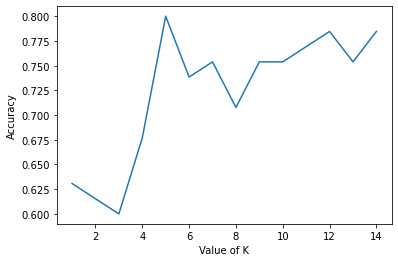

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(range_k,scores_list)
plt.xlabel("Value of K")
plt.ylabel("Accuracy")

Look at the graph and determine what value of K will work best.

In [ ]:
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8


In [ ]:
result = metrics.confusion_matrix(y_test, y_pred)
print("New Confusion Matrix:")
print(result)

New Confusion Matrix:
[[28  3]
 [10 24]]


## Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5846153846153846


## Final Results:

Linear SVC: 0.7076923076923077

Multinomial Naive Bayes: 0.7692307692307693

**KNeighbors: 0.8**

Random Forest: 0.5846153846153846

# **05 Using BERT on the un-derived essay files**

## Importing data and creating dataframe

In [ ]:
!pip install transformers

In [5]:
import json
#create lists to contain JUST the text part for each group (fm/non) of docs 
fm_texts= []
other_texts= []

#open/read our data then split and append into the lists above
with open('/content/drive/My Drive/Colab Notebooks/Med School Application/familyMedicine_031720.json', 'r') as f:
    data = json.load(f)
    for doc in data:
        if doc['keyword'] == 'TRUE':
            true_text = doc['text']
            fm_texts.append(true_text)
        if doc['keyword'] == 'FALSE':
            false_text = doc['text']
            other_texts.append(false_text)

#check our count to make sure we've got things right
print('Total Docs:', len(data))
print('Fam Med Docs:', len(fm_texts))
print('Other Docs:', len(other_texts))

Total Docs: 260
Fam Med Docs: 135
Other Docs: 125


In [8]:
import pandas as pd

fmdf = pd.DataFrame({'text': fm_texts,
                    'label':1})

othdf = pd.DataFrame({'text':other_texts, 
                    'label':0})

# combining our two dataframes into 1
df = pd.concat([fmdf, othdf],ignore_index=True)

display(df)

,text,label
0,I am a DAP (Dual Admissions Program) Student. ...,1
1,I am a Dual Admissions Student. Student Worker...,1
2,Throughout my life it has been proven to me ti...,1
3,"When I was in eighth grade, I had a personal m...",1
4,I am ten. We're at Grandma's for the holidays....,1
...,...,...
255,One could easily say I was always destined for...,0
256,There are some children who know at an early a...,0
257,"Facta non verba, deeds not words. This Latin t...",0
258,It's hard to pinpoint the moment when I decide...,0


Family medicine is 1, other is 0. Now the labels have been turned into 1s and 0s instead of strings.

## Lemmatization

In [9]:
#TextBlob (with POS tag)

from textblob import TextBlob
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

def pos_tagger(sentence): 
    sent = TextBlob(sentence) 
    tag_dict = {"J": 'a', "N": 'n', "V": 'v', "R": 'r'} 
    words_tags = [(w, tag_dict.get(pos[0], 'n')) for w, pos in sent.tags]     
    lemma_list = [wd.lemmatize(tag) for wd, tag in words_tags] 
    return lemma_list 
  

for index in df.index:
  words = df.loc[index,'text']
  sentence = words
  lemma_list = pos_tagger(sentence) 
  lemmatized_sentence = " ".join(lemma_list) 
  df.loc[index, 'text'] = lemmatized_sentence

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


Source: https://www.geeksforgeeks.org/python-lemmatization-approaches-with-examples/

## Implementing BERT
Source: https://jalammar.github.io/a-visual-guide-to-using-bert-for-the-first-time/

In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import torch
import transformers as ppb
import warnings
warnings.filterwarnings('ignore')

In [12]:
model_class, tokenizer_class, pretrained_weights = (ppb.BertModel, ppb.BertTokenizer, 'bert-base-uncased')

# # Load pretrained model/tokenizer
tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
model = model_class.from_pretrained(pretrained_weights)

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/420M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [13]:
tokenized = df['text'].apply((lambda x: tokenizer.encode(x, add_special_tokens=True, truncation=True, max_length=512)))

We had to turn on truncation here. The largest essay was made up of around 1300 tokens, and the max length is 512 for this model. So the tokenizer just truncates it at 512 tokens/words.

In [14]:
display(tokenized)

0      [101, 1045, 2022, 1037, 4830, 2361, 7037, 2024...
1      [101, 1045, 2022, 1037, 7037, 20247, 3076, 307...
2      [101, 2802, 2026, 2166, 2009, 2031, 2022, 6011...
3      [101, 2043, 1045, 2022, 1999, 5964, 3694, 1045...
4      [101, 1045, 2022, 2702, 2057, 1005, 2128, 2012...
                             ...                        
255    [101, 2028, 2071, 4089, 2360, 1045, 2022, 2467...
256    [101, 2045, 2022, 2070, 2775, 2040, 2113, 2012...
257    [101, 2755, 2050, 2512, 12034, 2050, 15616, 20...
258    [101, 2009, 1005, 1055, 2524, 2000, 9231, 8400...
259    [101, 2026, 3239, 13594, 1996, 15079, 1997, 73...
Name: text, Length: 260, dtype: object

In [15]:
max_len = 0
for i in tokenized.values:
    if len(i) > max_len:
        max_len = len(i)

padded = np.array([i + [0]*(max_len-len(i)) for i in tokenized.values])

In [17]:
attention_mask = np.where(padded != 0, 1, 0)

In [18]:
input_ids = torch.tensor(padded)  
attention_mask = torch.tensor(attention_mask)

with torch.no_grad():
    last_hidden_states = model(input_ids, attention_mask=attention_mask)

In [20]:
features = last_hidden_states[0][:,0,:].numpy()

In [21]:
labels = df['label']
train_features, test_features, train_labels, test_labels = train_test_split(features, labels)

In [40]:
train_labels = train_labels.astype('int')

parameters = {'C': np.linspace(0.0001, 100, 20)}
grid_search = GridSearchCV(LogisticRegression(), parameters)
grid_search.fit(train_features, train_labels)

print('best parameters: ', grid_search.best_params_)
print('best scrores: ', grid_search.best_score_)

best parameters:  {'C': 0.0001}
best scrores:  0.5435897435897435


In [41]:
lr_clf = LogisticRegression(C = 0.0001)
lr_clf.fit(train_features, train_labels)

LogisticRegression(C=0.0001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
lr_clf.score(test_features, test_labels)

0.4461538461538462

In [43]:
from sklearn.dummy import DummyClassifier
clf = DummyClassifier()

scores = cross_val_score(clf, train_features, train_labels)
print("Dummy classifier score: %0.3f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Dummy classifier score: 0.508 (+/- 0.17)
